In [7]:
from math import e, pi, sin, cos
from scipy.integrate import romberg, quad
from scipy.optimize import newton
from scipy.stats import norm
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import numpy as np

***Zadanie 1***   
Na przedziale [0,1] dana jest funkcja 
$ f(x) = e^{-2x}$
Oblicz całkę $\int_{0}^{1}f(x)dx$ korzystając z:
1. metody analitycznej,
2. metody prostokątów,
3. prostego wzoru trapezów,
4. prostego wzoru Simpsona,
5. złożonego wzoru trapezów (10 podprzedziałów),
6. złożonego wzoru Simpsona (10 podprzedziałów),
7. metody [Romberga](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) z dokładnością $10^{-6}$,
8. metody [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). 

Dokonaj własnej implementacji metod 2-6. Porównaj otrzymane wyniki. Który z nich jest najbardziej zbliżony do wyniku analitycznego?

1. metoda analityczna:
\begin{align}
t &= -2x \\ 
dt &= -2dx \\
\int e^{-2x}dx &= -\frac{1}{2}\int e^tdt \\
               &= -\frac{1}{2}\cdot e^t + C \\
               &= -\frac{1}{2}\cdot e^{-2x} + C \\
\end{align}
$$
\int_{0}^{1}e^{-2x}dx = -\frac{1}{2}\cdot e^{-2\cdot 1} + C - \left( -\frac{1}{2}\cdot e^{-2 \cdot 0} + C \right) = -\frac{1}{2}\cdot e^{-2} + \frac{1}{2}\cdot e^{0} = -\frac{1}{2\cdot e^{2}} + \frac{1}{2} = \frac{1}{2} - \frac{1}{2e^2} \approx 0.43233
$$

In [55]:
wynik = 0.43233235838169365405300025251375780
y = lambda x : e**(-2*x)

#2. Metoda prostokątów:
def intMetProstokatow(f, a, b):
    return (b-a)*f((a+b)/2)

#3. Prosty wzór trapezów:
def intProstyTrapezow(f, a, b):
    return (b-a)*(f(a) + f(b))/2

#4. Prosty wzór Simpsona:
def intProstySimpsona(f, a, b):
    return (b-a)*(f(a) + 4*f((a+b)/2) + f(b))/6

#5. Złożony wzór trapezów:
def intZlozonTrapezow(f, a, b, n=10):
    dx = (b-a)/n
    return sum([intProstyTrapezow(f, a+dx*i, a+dx*(i+1)) for i in range(0, n)])

#6. Złożony wzór Simpsona:
def intZlozonSimpsona(f, a, b, n=10):
    dx = (b-a)/n
    return sum([intProstySimpsona(f, a+dx*i, a+dx*(i+1)) for i in range(0, n)])


print("Wyniki:")
print(" 2. prostokątów:  {:.18f}".format(intMetProstokatow(y, 0, 1)))
print(" 3. trapezów:     {:.18f}".format(intProstyTrapezow(y, 0, 1)))
print(" 4. Simpsona:     {:.18f}".format(intProstySimpsona(y, 0, 1)))
print(" 5. zł. trapezów: {:.18f}".format(intZlozonTrapezow(y, 0, 1)))
print(" 6. zł. Simpsona: {:.18f}".format(intZlozonSimpsona(y, 0, 1)))
print(" 7. met. Romberg: {:.18f}".format(romberg(y, 0, 1, tol=10**-6, rtol=10**-6)))
print(" 8. met. quad:    {:.18f}".format(quad(y, 0, 1)[0]))

print("\nbłędy:")
print(" 2. prostokątów:  {:.18f}".format(abs(intMetProstokatow(y, 0, 1) - wynik)))
print(" 3. trapezów:     {:.18f}".format(abs(intProstyTrapezow(y, 0, 1) - wynik)))
print(" 4. Simpsona:     {:.18f}".format(abs(intProstySimpsona(y, 0, 1) - wynik)))
print(" 5. zł. trapezów: {:.18f}".format(abs(intZlozonTrapezow(y, 0, 1) - wynik)))
print(" 6. zł. Simpsona: {:.18f}".format(abs(intZlozonSimpsona(y, 0, 1) - wynik)))
print(" 7. met. Romberg: {:.18f}".format(abs(romberg(y, 0, 1, tol=10**-6, rtol=10**-6) - wynik)))
print(" 8. met. quad:    {:.18f}".format(abs(quad(y, 0, 1)[0] - wynik)))

print("\nNajbliższy prawdziwemu jest wynik otrzymany metodą scipy.integrate.quad")

Wyniki:
 2. prostokątów:  0.367879441171442334
 3. trapezów:     0.567667641618306407
 4. Simpsona:     0.434475507987063692
 5. zł. trapezów: 0.433772506418466930
 6. zł. Simpsona: 0.432332598280703029
 7. met. Romberg: 0.432332358389435567
 8. met. quad:    0.432332358381693593

błędy:
 2. prostokątów:  0.064452917210251315
 3. trapezów:     0.135335283236612758
 4. Simpsona:     0.002143149605370043
 5. zł. trapezów: 0.001440148036773281
 6. zł. Simpsona: 0.000000239899009380
 7. met. Romberg: 0.000000000007741918
 8. met. quad:    0.000000000000000056

Najbliższy prawdziwemu jest wynik otrzymany metodą scipy.integrate.quad


***Zadanie 2***  
Dane jest równanie: $$\int_{0}^{x}\frac{1}{\sqrt{2\pi}}e^{\frac{-t^2}{2}}dt=0.45$$ Rozwiąż je korzystając z metody Newtona z dokładnością $10^{-5}$ za punkt startowy przyjmując $p_0=0.5$. Do obliczenia całki zastosuj złożony wzór trapezów oraz złożony wzór Simpsona. Porównaj otrzymane wyniki z wartością referencyjną.


***Wskazówka***: Zauważ, że powyższa całka opisuje prawdopodobieństwo $P(0\leq t\leq x)$ dla zmiennej losowej $t$ o rozkładzie Gaussa z parametrami $\mu=0,\sigma=1$. Do wyznaczenia wartości referencyjnej możesz użyć metody z  klasy [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

szukane miejsce zerowe funkcji:

\begin{align}
f\left(x\right) &= \int_{0}^{x}\frac{1}{\sqrt{2\pi}}e^{\frac{-t^2}{2}}dt - 0.45 \\
f\left(x\right)' &= \frac{e^{\frac{-x^2}{2}}}{\sqrt{2\pi}}
\end{align}
[pochodna f(x)](https://www.wolframalpha.com/input/?i=derivative+of++(%5Cint_%7B0%7D%5E%7Bx%7D%5Cfrac%7B1%7D%7B%5Csqrt%7B2%5Cpi%7D%7D*e%5E%7B%5Cfrac%7B-t%5E2%7D%7B2%7D%7Ddt)+by+x)

In [58]:
_f = lambda t : 1 / (2*pi)**(1/2) * e**(-t**2/2)
f_trap = lambda x : intZlozonTrapezow(_f, 0, x) - 0.45
f_Simp = lambda x : intZlozonSimpsona(_f, 0, x) - 0.45
f_prime = lambda x : e**(-x**2/2)/(2*pi)**(1/2)

x0_trap = newton(f_trap, 0.5, f_prime, tol=10e-5)
x0_Simp = newton(f_Simp, 0.5, f_prime, tol=10e-5)

blad_trap = abs(norm.ppf(0.95, 0, 1) - x0_trap)
blad_Simp = abs(norm.ppf(0.95, 0, 1) - x0_Simp)

print("Wyniki:")
print(' złożony wzór trapezów: {:.8f}'.format(x0_trap))
print(' złożony wzór Simpsona: {:.8f}'.format(x0_Simp))

print('\nBłędy:')
print(' błąd ze złożonym wzorem trapezów: {:.8f}'.format(blad_trap))
print(' błąd ze złożonym wzorem Simpsona: {:.8f}'.format(blad_Simp))

Wyniki:
 złożony wzór trapezów: 1.64857638
 złożony wzór Simpsona: 1.64485350

Błędy:
 błąd ze złożonym wzorem trapezów: 0.00372276
 błąd ze złożonym wzorem Simpsona: 0.00000012


***Zadanie 3***  
Kierowca jadący z miasta A do miasta B, zauważywszy na drodze przeszkodę, zaczął gwałtownie hamować aż do zatrzymania po czterech sekundach. Przyspieszenie jego samochodu zarejestrowane przez przypadkowego fizyka obserwującego zdarzenie przedstawione jest w poniższej tabeli. 

|czas \[s\]|przyspieszenie \[$\frac{m}{s^2}$\]|
|--|--|
|0.0|-4.5|
|0.5|-4.5|
|1.0|-2.3|
|2.0|-1.0|
|3.0|-0.5|
|4.0|0.0|

* Oblicz drogę hamowania pojazdu.
* Oblicz prędkość średnią samochodu w przedziale $t=\left[0,0.5\right]$.

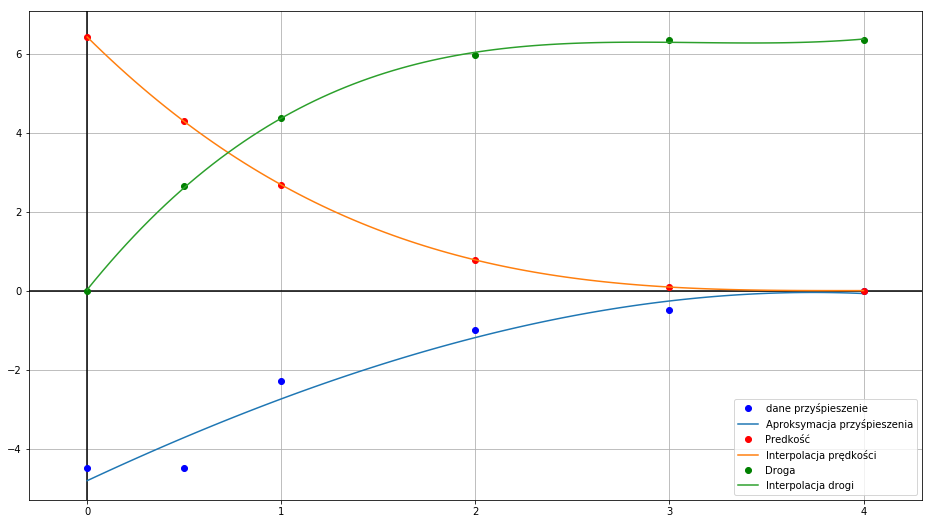

Droga hamowania pojazdu: 6.365m
Średnia prędość w przedziale t=[0;0.5]: 5.312m/s (19.122km/h)


In [12]:
x_toDraw = np.linspace(0, 4, 100)
t = [0,     0.5,    1,  2,    3, 4]

a = [-4.5, -4.5, -2.3, -1, -0.5, 0]
a_poly = np.poly1d(np.polyfit(t, a, 3))

v = np.array([quad(a_poly, 0, i)[0] for i in t])
v_poly = np.poly1d(np.polyfit(t, v, 3))

# Zmieniam wektor prędkości chwilowych i wielomian otrzymany w wyniku ich aproksymacji 
# tak, aby w chwili t=4 prędkość wynosiła 0 (wedle treści zadania)
v_poly -= v[-1]
v -= v[-1]

s = [quad(v_poly, 0, i)[0] for i in t]
s_poly = np.poly1d(np.polyfit(t, s, 3))

plt.figure(figsize=(16, 9))
plt.plot(t, a, "bo", label="dane przyśpieszenie")
plt.plot(x_toDraw, a_poly(x_toDraw), label="Aproksymacja przyśpieszenia")
plt.plot(t, v, "ro", label="Predkość")
plt.plot(x_toDraw, v_poly(x_toDraw), label="Interpolacja prędkości")
plt.plot(t, s, "go", label="Droga")
plt.plot(x_toDraw, s_poly(x_toDraw), label="Interpolacja drogi")
plt.grid()
plt.legend()
plt.hlines(0, -2, 6)
plt.vlines(0, -6, 8)
plt.xlim(-0.3, 4.3)
plt.ylim(-5.3, 7.1)
plt.show()

print('Droga hamowania pojazdu: {:.3f}m'.format(s[-1]))
print('Średnia prędość w przedziale t=[0;0.5]: {:.3f}m/s ({:.3f}km/h)'.format(s[1]/0.5, s[1]/0.5 * 3.6))

***Zadanie 4***  
Arkusz blachy falistej otrzymywany jest poprzez prasowanie blachy płaskiej na formie w kształcie fali. Profil fali można opisać funkcją $f(x)=A\sin(2\pi\frac{x}{T})$. Pracownik fabryki chce uzyskać arkusz blachy falistej o długości $4.8 \textrm{m}$, amplitudzie $A=0.1 \textrm{m}$ i okresie $T=0.2\textrm{m}$.
* Oblicz, ile metrów bieżących płaskiej blachy potrzeba do wyprodukowania opisanego arkusza. Obliczenia wykonaj wykorzystając złożoną metodę trapezów, złożoną metodę Simpsona oraz metodę Romberga, a następnie porównaj otrzymane rezultaty.
* Dla wzoru trapezów oraz wzoru Simpsona wykonaj wykres prezentujący otrzymany rezultat w zależności od ilości podprzedziałów (od 1 do 100). Skomentuj otrzymane rezultaty.

***Wskazówka***: Wykorzystaj znany Ci z analizy matematycznej wzór na [długość łuku krzywej](https://pl.wikipedia.org/wiki/Długość_łuku).

Wymagana długość arkusza płaskiej blachy:
 metoda trapezów: 11.0849845346233966
 metoda Simpsona: 11.0849845346233877
 metoda Romgerga: 15.8251598854829520


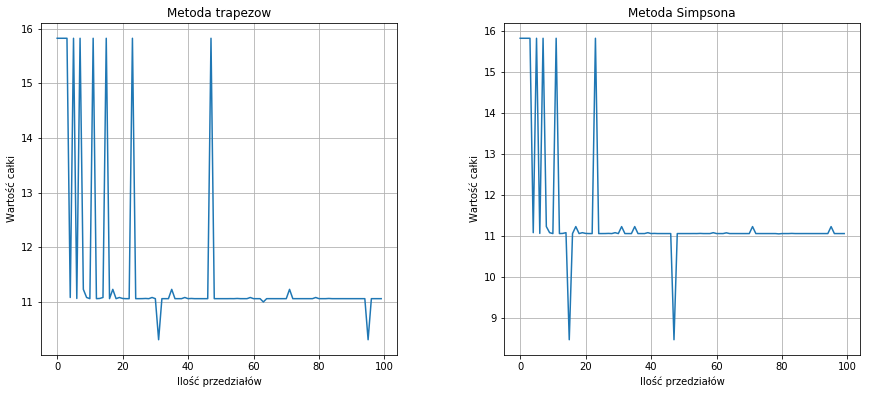

In [59]:
A = 0.1#m
T = 0.2#m
f = lambda x : A*sin(2*pi*x/T)
f_prime = lambda x : 2*pi*A*cos(2*pi*x/T)/T
F = lambda x : (1 + f_prime(x)**2)**(1/2)

#4-1
int_trap = intZlozonTrapezow(F, 0, 4.8)
int_Simp = intZlozonSimpsona(F, 0, 4.8)
int_Romb = romberg(F, 0, 4.8)

print("Wymagana długość arkusza płaskiej blachy:")
print(" metoda trapezów: {:.16f}".format(int_trap))
print(" metoda Simpsona: {:.16f}".format(int_Simp))
print(" metoda Romgerga: {:.16f}".format(int_Romb))

#4-2
ints_trap = [ intZlozonTrapezow(F, 0, 4.8, n=i) for i in range(1, 101) ]
ints_Simp = [ intZlozonSimpsona(F, 0, 4.8, n=i) for i in range(1, 101) ]

plt.subplot(121)
plt.plot(ints_trap)
plt.title("Metoda trapezow")
plt.xlabel("Ilość przedziałów")
plt.ylabel("Wartość całki")
plt.grid()

plt.subplot(122)
plt.plot(ints_Simp)
plt.title("Metoda Simpsona")
plt.xlabel("Ilość przedziałów")
plt.ylabel("Wartość całki")
plt.grid()

plt.tight_layout()
plt.subplots_adjust(right=2, top=1.3)
plt.show()

Metoda Romberga w tym przypadku daje niepoprawny wynik.

Niemiarodajne wyniki metod trapezów i Simpsona dla niektórych wartości paramateru ilości przedziałów wynikają z faktu okresowości funkcji cosinusa, jeżeli ilość przedziałów jest odpowiednia, punkty a, b (oraz (a+b)/2 w przypadku metody Simpsona) mogą częściej wypadać na dodatniej lub ujemnej części funkcji.